In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import networkx as nx
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import gudhi as gd

# Limpieza de Datos

In [2]:
# Cargamos la base de datos
pkl = pd.read_pickle('uke_eggedal_data_challenge.pkl')
pkl

{'flow': array([1.72378057e+00, 9.60881602e-01, 1.00000000e-03, ...,
        3.55681843e+00, 3.40213266e+00, 1.81279569e+00]),
 'obs_tas': array([[-10.60000038,  -9.69999981,  -6.69999981, ...,  -8.10000038,
          -6.5       ,  -5.4000001 ],
        [-20.5       , -19.10000038, -12.        , ..., -15.5       ,
         -11.80000019,  -9.10000038],
        [-23.60000038, -22.5       , -15.10000038, ..., -19.39999962,
         -14.60000038, -12.19999981],
        ...,
        [-11.89999962, -11.39999962,  -8.39999962, ...,  -9.30000019,
          -7.19999981,  -6.30000019],
        [ -7.        ,  -6.5       ,  -3.4000001 , ...,  -5.        ,
          -3.79999995,  -3.        ],
        [ -2.4000001 ,  -2.0999999 ,   1.29999995, ...,  -0.89999998,
           0.5       ,   1.10000002]]),
 'flow_dates': 1958-01-04   1958-01-04
 1958-01-05   1958-01-05
 1958-01-06   1958-01-06
 1958-01-07   1958-01-07
 1958-01-08   1958-01-08
                 ...    
 2016-12-22   2016-12-22
 2016-12-2

In [3]:
# Registros por columna
for i in pkl.keys():
    print(i, len(pkl[i]))

flow 21542
obs_tas 21546
flow_dates 21542
obs_lon_lat 2
obs_pr 21546
obs_dates 21546


In [4]:
# Formateamos el data frame
df1 = pd.DataFrame(pkl['flow'])
df1.columns = ['flow']

df2 = pd.DataFrame(pkl['obs_tas'])
df2.columns = ['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8']

df3 = pd.DataFrame(pkl['flow_dates'])
df3.columns = ['flow_dates']

df4 = pd.DataFrame(pkl['obs_pr'])
df4.columns = ['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8']

df5 = pd.DataFrame(pkl['obs_dates'])
df5.columns = ['dates']

In [5]:
# Ajustamos el indice a las fechas con las que contamos
df = pd.concat([df1, df2, df4], axis=1, join='inner')
df.index = df3.index
df =pd.concat([df, df5], axis=1, join='inner')
df

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,dates
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2.177040,-10.300000,-10.6,-13.8,-11.300000,-10.600000,-11.800000,-11.4,-12.2,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-27
2015-12-28,4.876250,-14.700000,-15.1,-15.7,-16.000000,-15.200000,-13.700000,-15.4,-13.9,-13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-28
2015-12-29,4.998840,-9.500000,-8.9,-11.0,-9.700000,-9.200000,-9.600000,-9.3,-10.3,-10.3,0.5,0.1,1.0,0.5,0.3,0.1,0.8,0.0,0.0,2015-12-29
2015-12-30,4.428777,-2.000000,-1.2,-4.2,0.000000,-0.500000,-1.000000,0.4,-3.2,-4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-30


# ACP para reducir la dimensión de la base de datos

### Selección del número de componentes principales

In [6]:
# Separamos las variables
x = df.drop(['flow', 'dates'], axis=1)
y = df['flow']

In [7]:
# Función para evaluar el modelo 
def ACP_get_var_ratio(x, n_comp):
    pca = PCA(n_components=n_comp, random_state=1)
    pca.fit_transform(x)
    vr = pca.explained_variance_ratio_
    return vr

In [8]:
# Vemos el cambio en el porcentaje de la varianza explicada por cada numero de componentes
comps = [0,1,2,3,4,5,6]
c_rat = [list(ACP_get_var_ratio(x, c)) for c in comps]
var_rat = [sum(c_rat[i]) for i in range(len(c_rat))]
var_rat

[0,
 0.7686865222842169,
 0.9797609476690087,
 0.9878151476491149,
 0.9926573347390452,
 0.9952772151953668,
 0.9966408248452296]

Text(0, 0.5, 'Suma del porcentaje de la varianza explicada')

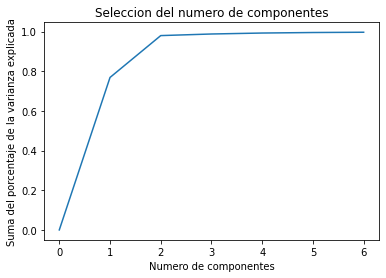

In [9]:
# Graficamos para determinar la cantidad de componentes principales
plt.plot([str(comp) for comp in comps], var_rat)
plt.title('Seleccion del numero de componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Suma del porcentaje de la varianza explicada')

### Implementación de análisis de componentes principales

In [10]:
# Obtenemos los componentes principales
pca = PCA(n_components=2, random_state=1)
df_pca = pca.fit_transform(x)
df_pca

array([[30.022471  , -3.98695298],
       [51.21656534, -2.09949225],
       [61.11236296, -0.58449125],
       ...,
       [35.28168917, -2.65046853],
       [11.78249488, -5.71016967],
       [-6.54788857, -5.98581035]])

In [11]:
# Varianza explicada por 2 componentes principales
sum(pca.explained_variance_ratio_)

0.9797609476690087

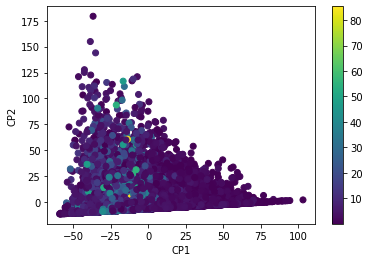

In [12]:
# Visualizamos los datos dispersos en los componentes principales
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y)
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.colorbar()

# Clustering

### K - means con todas las variables

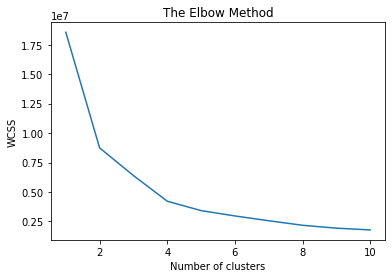

In [13]:
# Buscamos el número óptimo de clusters con todas las variables
wcss_all = []
for i in range(1, 11):
    kmns = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmns.fit(x)
    wcss_all.append(kmns.inertia_)
plt.plot(range(1, 11), wcss_all)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

> Se determina que 4 es un buen número de clusters

In [14]:
# Obtenemos clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=2)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=2)

In [15]:
# Buscamos los centroides de los clusters
centers = kmeans.cluster_centers_
for i in range(4):
    print ("Centroide",i+1,": ", centers[i])

Centroide 1 :  [-1.85491874 -1.11659844  1.1901377  -0.26112145 -0.53544225  0.43155936
  0.12840839  0.96404912  1.51867014  1.22941322  1.1772857   1.22993425
  1.35677956  1.37031386  1.30672373  1.39966505  1.38010172  1.30449076]
Centroide 2 :  [-11.63251979 -11.1301891  -10.04760334 -10.75859718 -10.73342129
  -9.92451627 -10.37471417  -9.71083994  -9.1380387    0.99421724
   0.94846086   1.00969657   1.07449428   1.08863237   1.07772647
   1.15653034   1.16180739   1.12379068]
Centroide 3 :  [ 8.48631972  9.41960244 12.24732193 10.33008007 10.04925456 11.26816676
 10.74783269 11.9448095  12.79737714  1.30832413  1.22593871  1.26978189
  1.38607123  1.35063501  1.21826339  1.38440088  1.27453065  1.23800386]
Centroide 4 :  [ 3.64226415  4.47011322  7.3330566   5.37018868  5.06890567  6.26603774
  5.79064151  7.00694339  7.89471697 13.74935848 14.91109435 15.13841512
 15.78347169 16.71924527 17.02120755 16.73743395 18.75932074 17.45449058]


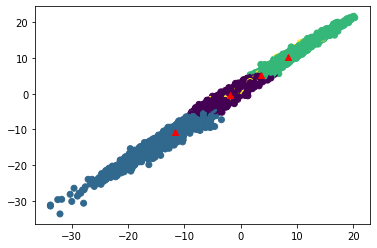

In [16]:
# Visualisamos desde cierta perspectiva
plt.scatter(x.iloc[:,0],x.iloc[:,3],c = kmeans.labels_)
plt.scatter(centers[:,0],centers[:,3],marker = '^', c = 'r')

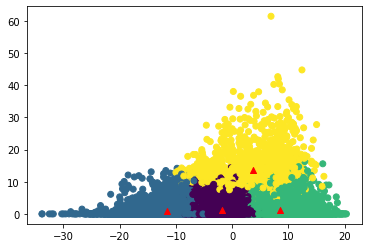

In [17]:
# Visualisamos desde cierta otra perspectiva
plt.scatter(x.iloc[:,0],x.iloc[:,9],c = kmeans.labels_)
plt.scatter(centers[:,0],centers[:,9],marker = '^', c = 'r')

### K - means con los componentes principales

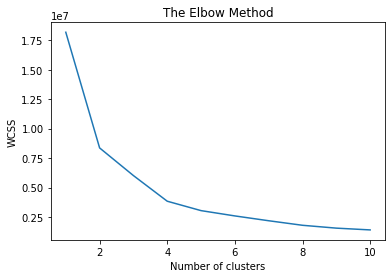

In [18]:
# Buscamos el número óptimo de clusters con todas las variables
wcss_cp = []
for i in range(1, 11):
    kms = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kms.fit(df_pca)
    wcss_cp.append(kms.inertia_)
plt.plot(range(1, 11), wcss_cp)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

> Se determina que 4 es un buen número de clusters

In [19]:
# Obtenemos clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=2)
kmeans_pcs = kmeans.fit_predict(df_pca)

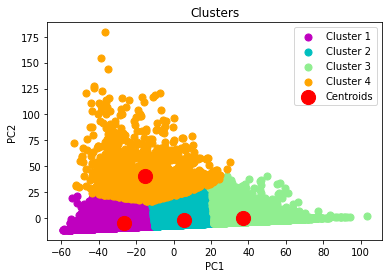

In [20]:
# Visualizamos los clusters
plt.scatter(df_pca[kmeans_pcs == 0, 0], df_pca[kmeans_pcs == 0, 1], s = 50, c = 'm', label = 'Cluster 1')
plt.scatter(df_pca[kmeans_pcs == 1, 0], df_pca[kmeans_pcs == 1, 1], s = 50, c = 'c', label = 'Cluster 2')
plt.scatter(df_pca[kmeans_pcs == 2, 0], df_pca[kmeans_pcs == 2, 1], s = 50, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(df_pca[kmeans_pcs == 3, 0], df_pca[kmeans_pcs == 3, 1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'r', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Observaciónes sobre el tiempo

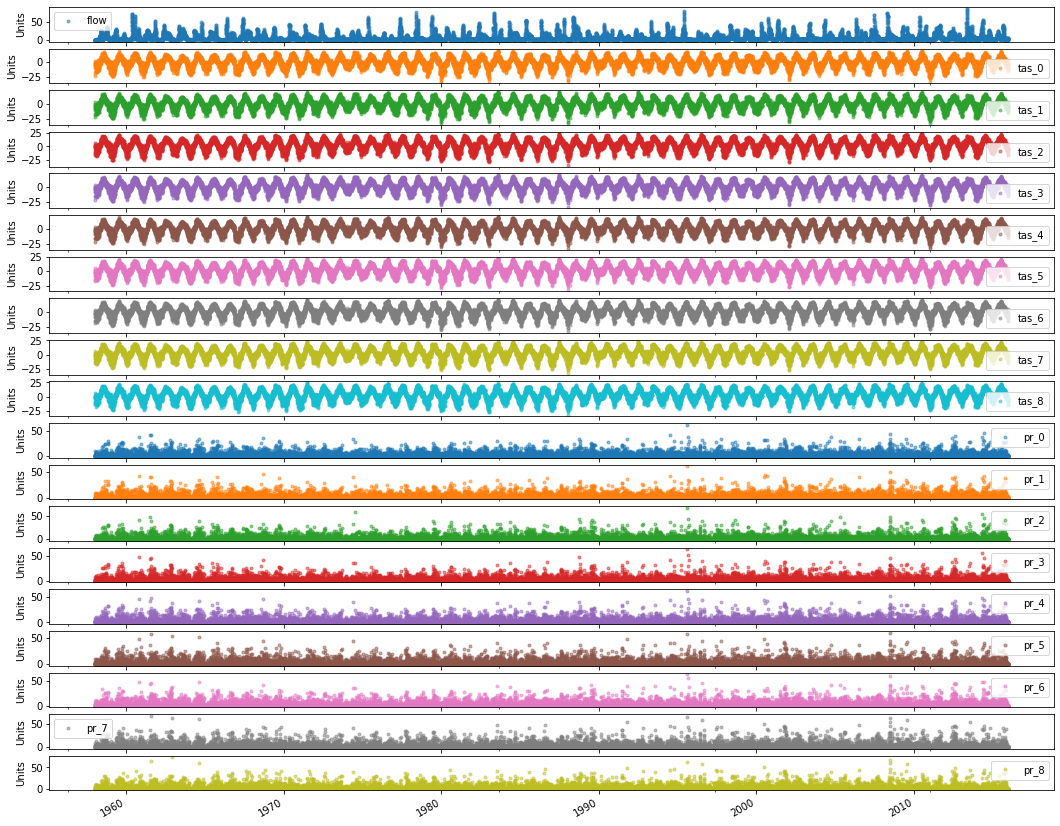

In [21]:
df2 = df.drop(['dates'], axis=1)
axes = df2.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 16), subplots=True)
for ax in axes:
    ax.set_ylabel('Units')

In [22]:
# Separamos las variables de temperatura y presión
temp = x[['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8']]
pres = x[['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8']]

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


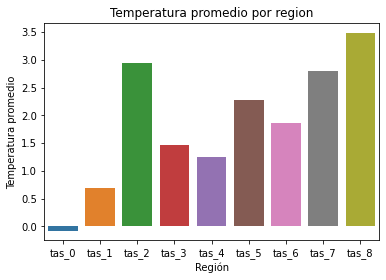

In [23]:
# Obtenemos la temperatura promedio
sns.barplot(x=temp.columns, y=np.mean(temp))
plt.title("Temperatura promedio por region")
plt.ylabel('Temperatura promedio')
plt.xlabel('Región')
plt.show()

# Complejos Simpliciales

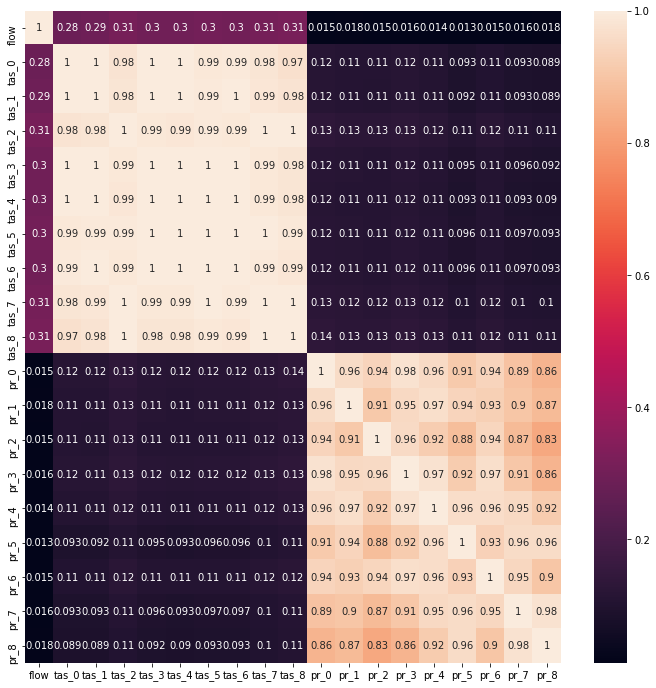

In [24]:
# Buscamos matriz de correlaciones
plt.figure(figsize=(12, 12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

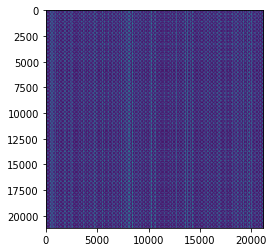

In [25]:
D = pairwise_distances(df_pca)
plt.imshow(D)
plt.show()

## DATOS TEMPORALES

In [26]:
df_pca

array([[30.022471  , -3.98695298],
       [51.21656534, -2.09949225],
       [61.11236296, -0.58449125],
       ...,
       [35.28168917, -2.65046853],
       [11.78249488, -5.71016967],
       [-6.54788857, -5.98581035]])

In [44]:
aux = df_pca[:500,:]
aux

array([[ 3.00224710e+01, -3.98695298e+00],
       [ 5.12165653e+01, -2.09949225e+00],
       [ 6.11123630e+01, -5.84491246e-01],
       [ 4.99046876e+01, -2.67718500e-01],
       [ 2.79926246e+01,  2.33921625e+01],
       [ 8.20250031e+00,  3.44488195e+00],
       [ 1.10545446e+01, -5.49788978e+00],
       [ 2.14074603e+00, -6.43320071e+00],
       [-8.47751903e+00, -7.29082257e+00],
       [ 2.32132907e+00, -2.89172363e+00],
       [ 1.28497771e+01, -5.49401361e+00],
       [ 1.52968751e+01, -6.40599564e-01],
       [ 1.88168704e+01,  7.69735162e+00],
       [ 4.52108512e+01, -1.35112139e+00],
       [ 5.39574829e+01, -2.14493438e+00],
       [ 2.92741434e+01, -4.28084968e+00],
       [ 1.70216206e+01, -5.21439553e+00],
       [ 2.65647479e+01, -4.43326412e+00],
       [ 7.93085854e+00, -5.97917763e+00],
       [ 5.09763334e+00, -6.17012124e+00],
       [ 1.30835501e+00, -6.44735285e+00],
       [ 8.36012004e+00, -5.84853253e+00],
       [ 1.86790748e+01, -5.02957005e+00],
       [ 2.

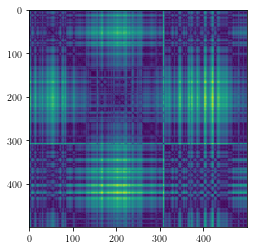

In [45]:
D = pairwise_distances(aux)
plt.imshow(D)
plt.show()

In [46]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

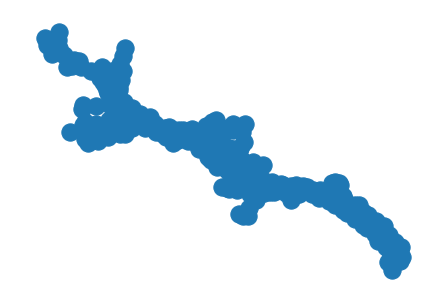

In [47]:
r = 3
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)

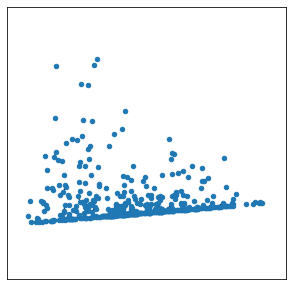

In [48]:
pos = {n:aux[n,:] for n in range(len(aux))}
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

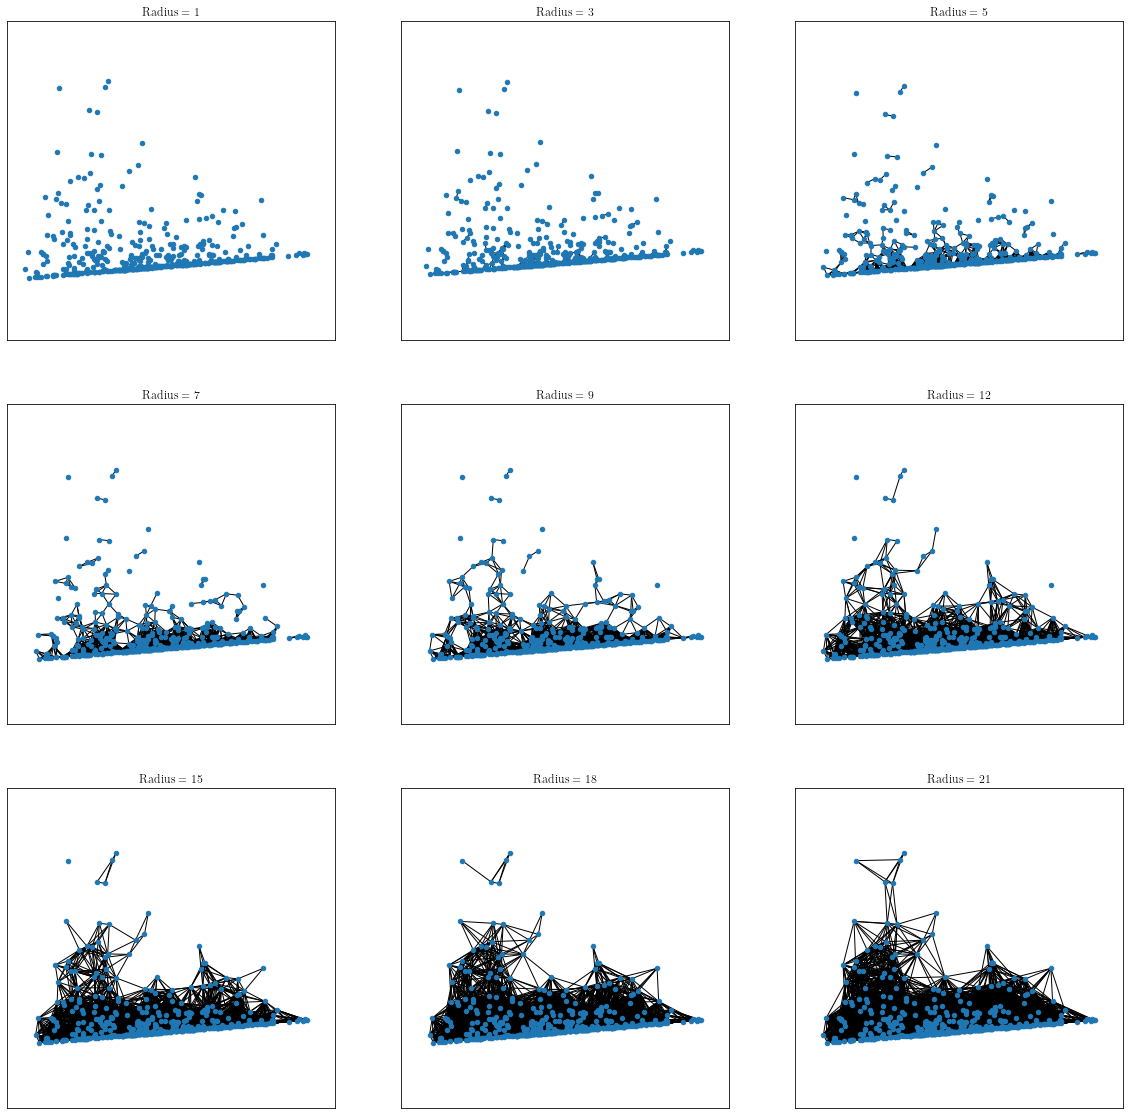

In [49]:
rs = [1,3,5,7,9,12,15,18,21]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

# Homología Persistente

### Dragramas de Persistencia y Códigos de Barras

In [50]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

Dimension 0


<Figure size 432x288 with 0 Axes>

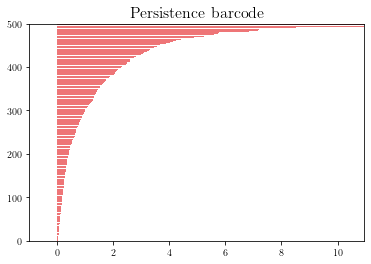

Dimension 1


<Figure size 432x288 with 0 Axes>

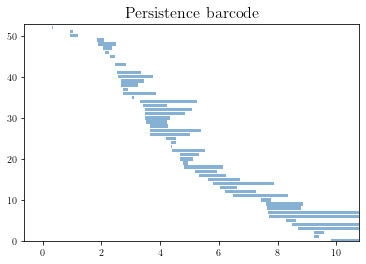

<Figure size 432x288 with 0 Axes>

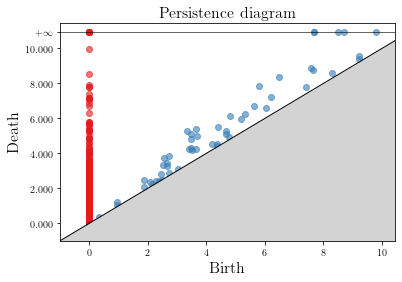

In [51]:
visualize_persistent_homology(aux)
visualize_persistent_homology(aux, style = 'diagrams')

In [ ]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)

In [ ]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
for splx in rips_list[0:200] :
    print(splx)

In [ ]:
BarCodes = Rips_complex.persistence()
BarCodes

In [ ]:
gd.plot_persistence_diagram(BarCodes)
plt.show()

In [ ]:
gd.plot_persistence_barcode(BarCodes)
plt.show()